In [1]:
import os,sys
from glob import glob
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image


img_dir = "/root/autoencoder_denoiser/dataset/real_img_referral_for_testing"
clean_dir = os.path.join(img_dir, "real_hsqc_clean")
noisy_dir = os.path.join(img_dir, "real_hsqc_noisy")
imgs_resized=[]
imgs_orig_size=[]
all_img_paths = (glob(noisy_dir+"/*"))

save_dir_resize = f'/root/autoencoder_denoiser/dataset/resized_real_imgs/'
save_dir_orig_size = f'/root/autoencoder_denoiser/dataset/orig_size_real_imgs/'
os.makedirs(save_dir_resize, exist_ok=True)
os.makedirs(save_dir_orig_size, exist_ok=True)

last_compound_name = ''
for img_path in tqdm(all_img_paths):
    noise_level = img_path.split('/')[-1].split('_')[-1]
    compound_name = img_path.split('/')[-1].split('_')[0]
   

    '''ground truth'''
    ground_path = img_path.replace("real_hsqc_noisy","real_hsqc_clean").replace("_noisy","_original")
    ground_path = ground_path[:-5] + '1.png'
    if ground_path[-6].isdigit():
        # print(ground_path)
        ground_path = ground_path[:-6]+ground_path[-5:]
    # print(gound_path)
    img = Image.open(ground_path)
    img = np.array(img)
    plus_groud = 1-img[:,:, 0]/255 # I will assume this is plus but not sure
    minus_groud = 1-img[:,:, 2]/255
    ground_truth = plus_groud - minus_groud
    ground_truth_resized = cv2.resize(ground_truth.astype("float32"), (120, 180))
   
    
    '''noise'''
    img = Image.open(img_path)
    img = np.array(img)
    plus = 1-img[:,:, 0]/255 # I will assume this is plus but not sure
    minus = 1-img[:,:, 2]/255
    # print(plus.shape)
    noise_input = plus-minus
    resized_input = cv2.resize(noise_input.astype("float32"), (120, 180))
    # noise_level = img_path.split('/')[-1].split('_')[-1]
    
    np.savez_compressed(f'{save_dir_resize}/{compound_name}_{noise_level}.npz', noise=resized_input, ground_truth=ground_truth_resized)
    np.savez_compressed(f'{save_dir_orig_size}/{compound_name}_{noise_level}.npz', noise=noise_input, ground_truth=ground_truth)
    

    # imgs_resized.append((resized_input,ground_truth_resized ))
    # imgs_orig_size.append((img_result, ground_truth))


100%|██████████| 60/60 [16:34<00:00, 16.58s/it]


In [ ]:
# np.save('/root/autoencoder_denoiser/dataset/resized_imgs_as_array.npy', np.array(imgs_resized, dtype=object), allow_pickle=True)
# np.save('/root/autoencoder_denoiser/dataset/resized_imgs_as_array.npy', np.array(imgs_orig_size, dtype=object), allow_pickle=True)
real_img_data_dir = f'/root/autoencoder_denoiser/dataset/resized_real_imgs/'
paths =  glob(real_img_data_dir+"*")
loaded_data = np.load(paths[0])


In [8]:
import numpy as np
saved_stuff = (np.array([1,2,3]), np.array([11,22,33]))
np.savez_compressed('/root/autoencoder_denoiser/dataset/test.npz', *saved_stuff)
b = np.load('/root/autoencoder_denoiser/dataset/test.npz')
b
# NONOOONONONON, still PICKLE

In [9]:
b['arr_0']

array([[ 1,  2,  3],
       [11, 22, 33]])

/tmp/ipykernel_10621/1825783255.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(50.0 * (high - low) / (1.0 + np.exp(-alpha*iter_num / max_iter)) - (high - low) + low)


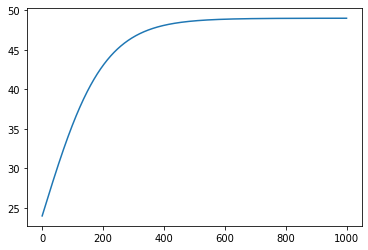

In [4]:
import numpy as np
def calc_coeff(iter_num, high=1.0, low=0.0, alpha=10.0, max_iter=1000.0):
    return np.float(50.0 * (high - low) / (1.0 + np.exp(-alpha*iter_num / max_iter)) - (high - low) + low)

a=[]
for i in range(1000):
    a.append(calc_coeff(i))
a = np.array(a)
import matplotlib.pyplot as plt
plt.plot(a)
